In [1]:
import pandas as pd
from time import time
df = pd.read_csv('data.csv')

In [2]:
df.head()

,match_id,radiant_adv_nw,radiant_adv_xp,radiant_adv_lh,radiant_win
0,0,707,1238,-39,True
1,1,-193,-1224,9,False
2,2,1035,1470,36,False
3,3,2464,2822,-7,False
4,4,6967,5261,150,True


In [3]:
X = df.iloc[:,1:4].values
y = df['radiant_win'].astype(int).values

# standardize scales
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [4]:
df1 = pd.DataFrame(X, columns=[['radiant_adv_nw', 'radiant_adv_xp', 'radiant_adv_lh']])
df1.head()

,radiant_adv_nw,radiant_adv_xp,radiant_adv_lh
0,0.110828,0.276997,-0.770115
1,-0.090740,-0.304696,0.164050
2,0.184288,0.331811,0.689518
3,0.504334,0.651246,-0.147339
4,1.512848,1.227505,2.908160


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [6]:
from sklearn.linear_model import LogisticRegression
t0 = time()
clf = LogisticRegression(random_state=0).fit(X_train,y_train)
print(f'training time: {round(time() - t0, 3)} s')

training time: 0.041 s


In [7]:
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

y_pred = clf.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred))
matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))
print(matrix)

0.6892159180297426
              precision    recall  f1-score   support

           0       0.69      0.66      0.67      7043
           1       0.69      0.72      0.71      7535

    accuracy                           0.69     14578
   macro avg       0.69      0.69      0.69     14578
weighted avg       0.69      0.69      0.69     14578

[[4645 2398]
 [2118 5417]]


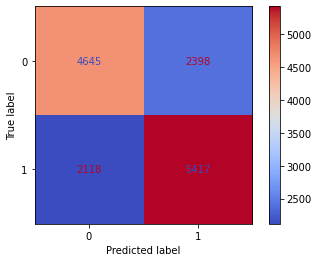

In [10]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test, cmap='coolwarm') 

Feature: 0, Score: 0.81808
Feature: 1, Score: 0.50515
Feature: 2, Score: -0.09937


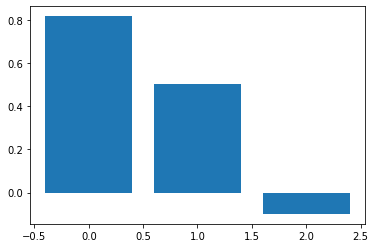

In [11]:
from matplotlib import pyplot
# get importance
importance = clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()